# Time Series Analysis 

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/gautamnaik1994/SalesForecasting_ML_CaseStudy/blob/main/notebooks/eda/04.TimeSeriesAnalysis.ipynb?flush_cache=true)


In [1]:
import plotly.io as pio
pio.renderers.default = "colab+notebook_connected+vscode"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from IPython.display import display, Markdown
pio.templates.default = "seaborn"

# pd.set_option('plotting.backend', 'plotly')

sns.set_theme(style="whitegrid")

# pio.renderers.default = "notebook_connected"
# png_renderer = pio.renderers["png"]
# png_renderer.width = 1200
# png_renderer.height = 500

In [2]:
df = pd.read_parquet("../../data/processed/train_enhanced.parquet")
train_region_code_agg = pd.read_parquet("../../data/processed/train_region_code_agg.parquet")
holiday_df= pd.read_csv("../../data/processed/holidays.csv")
train_agg = pd.read_parquet("../../data/processed/train_agg.parquet")

In [3]:
train_region_code_agg

,Date,Region_Code,Total_Sales,Avg_Sales,Total_Orders,Avg_Orders,Num_Stores,Holiday,Total_Discounts
0,2018-01-01,R4,2286812,45736,2914,58,50,1,50
1,2018-01-01,R2,4436859,42256,5644,54,105,1,105
2,2018-01-01,R3,3527439,41017,4599,53,86,1,86
3,2018-01-01,R1,5094374,41084,6509,52,124,1,124
4,2018-01-02,R4,2545119,50902,3057,61,50,0,50
...,...,...,...,...,...,...,...,...,...
2059,2019-05-30,R4,1966320,39326,2829,57,50,0,4
2060,2019-05-31,R2,4351299,41441,6411,61,105,1,11
2061,2019-05-31,R4,1909319,38186,2746,55,50,1,1
2062,2019-05-31,R1,5900798,47587,9433,76,124,1,18


In [47]:
train_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             516 non-null    datetime64[ns]
 1   Total_Sales      516 non-null    int32         
 2   Avg_Sales        516 non-null    int32         
 3   Total_Orders     516 non-null    object        
 4   Avg_Orders       516 non-null    int32         
 5   Holiday          516 non-null    int64         
 6   Total_Discounts  516 non-null    object        
 7   Holiday_Sales    68 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(2)
memory usage: 26.3+ KB


In [5]:
# train_region_code_agg = train_region_code_agg.set_index('Date')
# train_region_code_agg = train_region_code_agg.asfreq("D")

In [7]:
holidays=holiday_df[holiday_df["Holiday"]==1]["Date"].to_list()

In [7]:
# for store_type in train_store_type_agg["Store_Type"].unique():
#     fig.add_trace(go.Scatter(x=train_store_type_agg[train_store_type_agg["Store_Type"] == store_type]["Date"],
#                              y=train_store_type_agg[train_store_type_agg["Store_Type"] == store_type]["Total_Sales"],
#                              mode='lines',
#                              name=store_type))


# Individual Sales Analysis

In [8]:
plt.figure(figsize=(20, 10))
def plot_grouped_time_series(df, x, y, group, title, xaxis_title, yaxis_title):
    fig = px.line(df, x=x, y=y, color=group)
    for date in holidays:
        fig.add_shape(
            type="line",
            x0=date,
            x1=date,
            y0=0.05,  
            y1=0,   
            xref="x",
            yref="paper",
            line=dict(color="blue", width=2)
        )
    fig.update_layout(
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        xaxis_rangeslider_visible=True,
        height=800,
    )
    fig.show()

# Reset the index to make 'Date' a column
# train_region_code_agg_reset = train_region_code_agg.reset_index()

plot_grouped_time_series(train_region_code_agg, "Date", "Total_Sales", "Region_Code", "Sales per region code over time", "Date", "Total Sales")

<Figure size 2000x1000 with 0 Axes>

# Stationarity Check

We will use the Augmented Dickey-Fuller test to check if the time series is stationary.  
- Null Hypothesis: The time series is not stationary 
- Alternative Hypothesis: The time series is stationary

In [9]:
for Region_Code in train_region_code_agg["Region_Code"].unique():
    result = adfuller(train_region_code_agg[train_region_code_agg["Region_Code"]==Region_Code]["Total_Sales"])
    pvalue = result[1]
    if pvalue < 0.05:
        print(f"The series for location type {Region_Code} is stationary")
    else:
        print(f"The series for location type {Region_Code} is not stationary")

The series for location type R4 is stationary
The series for location type R2 is stationary
The series for location type R3 is stationary
The series for location type R1 is stationary


# Seasonal Decomposition

### Seasonal decomposition for Region code: R4

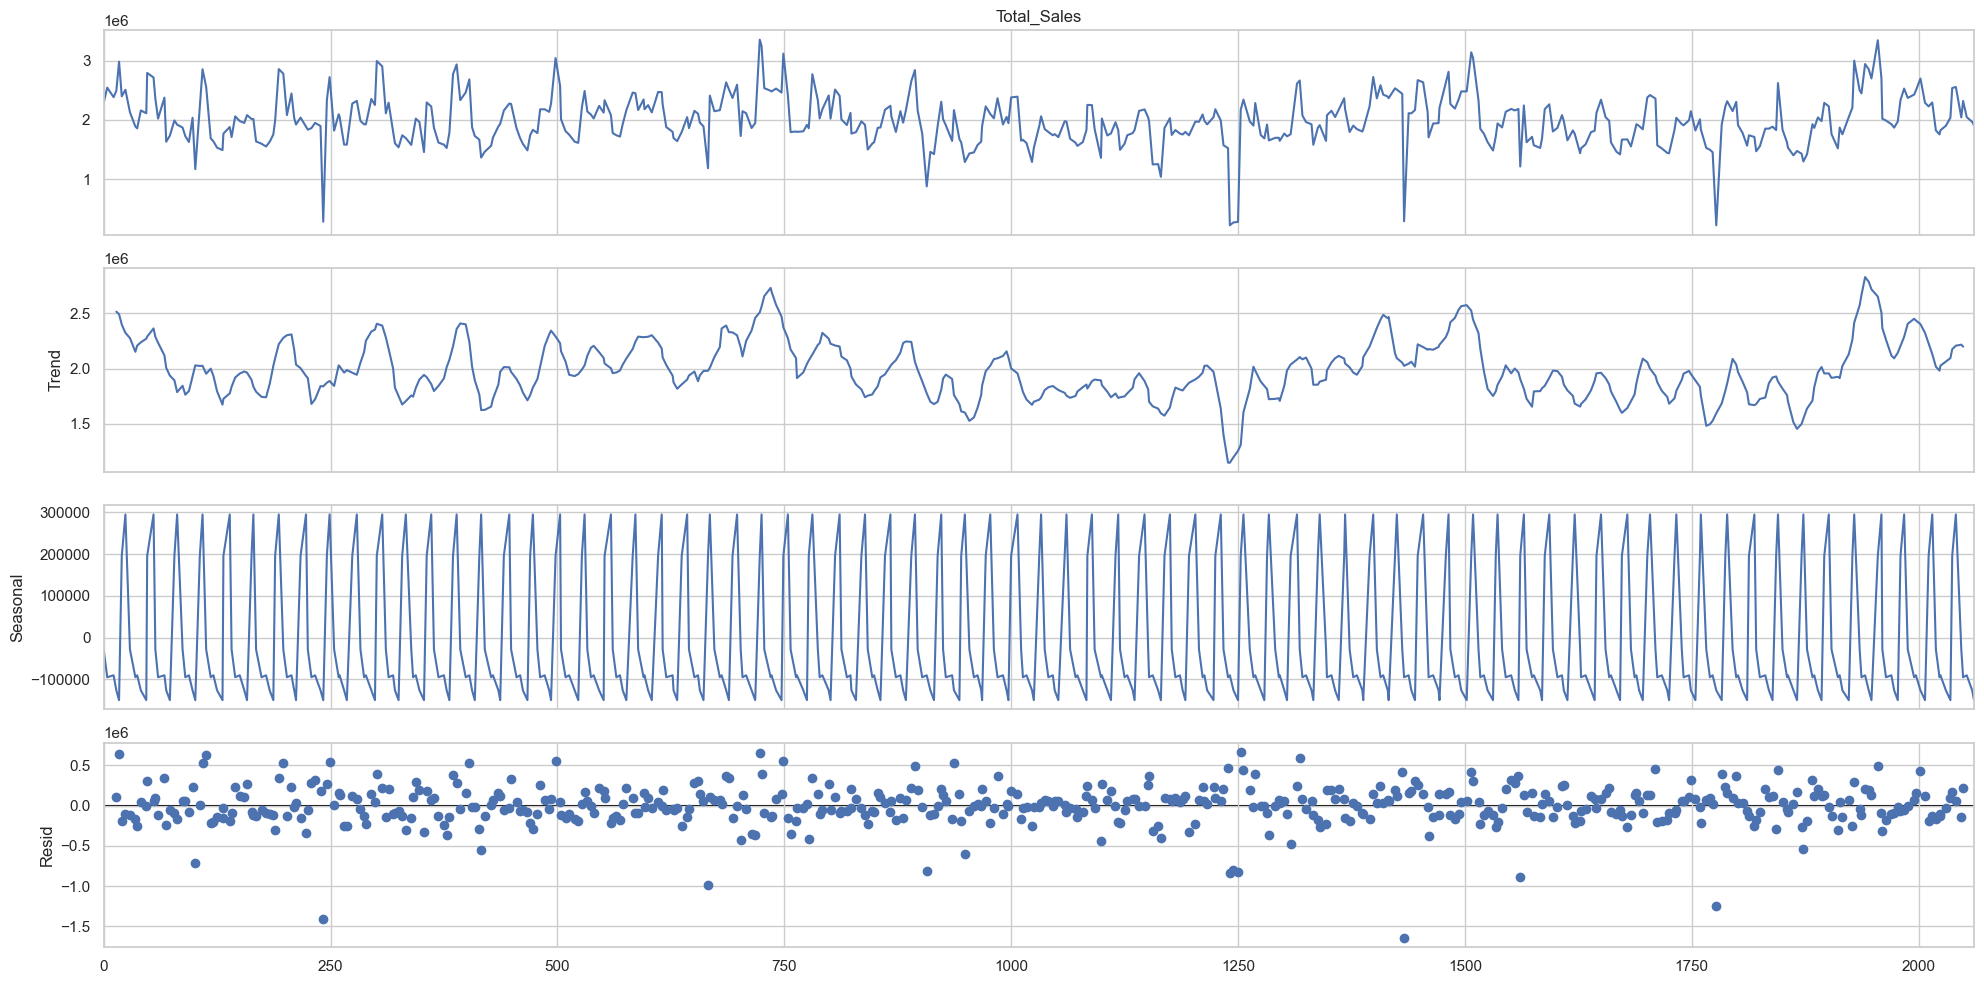

### Seasonal decomposition for Region code: R2

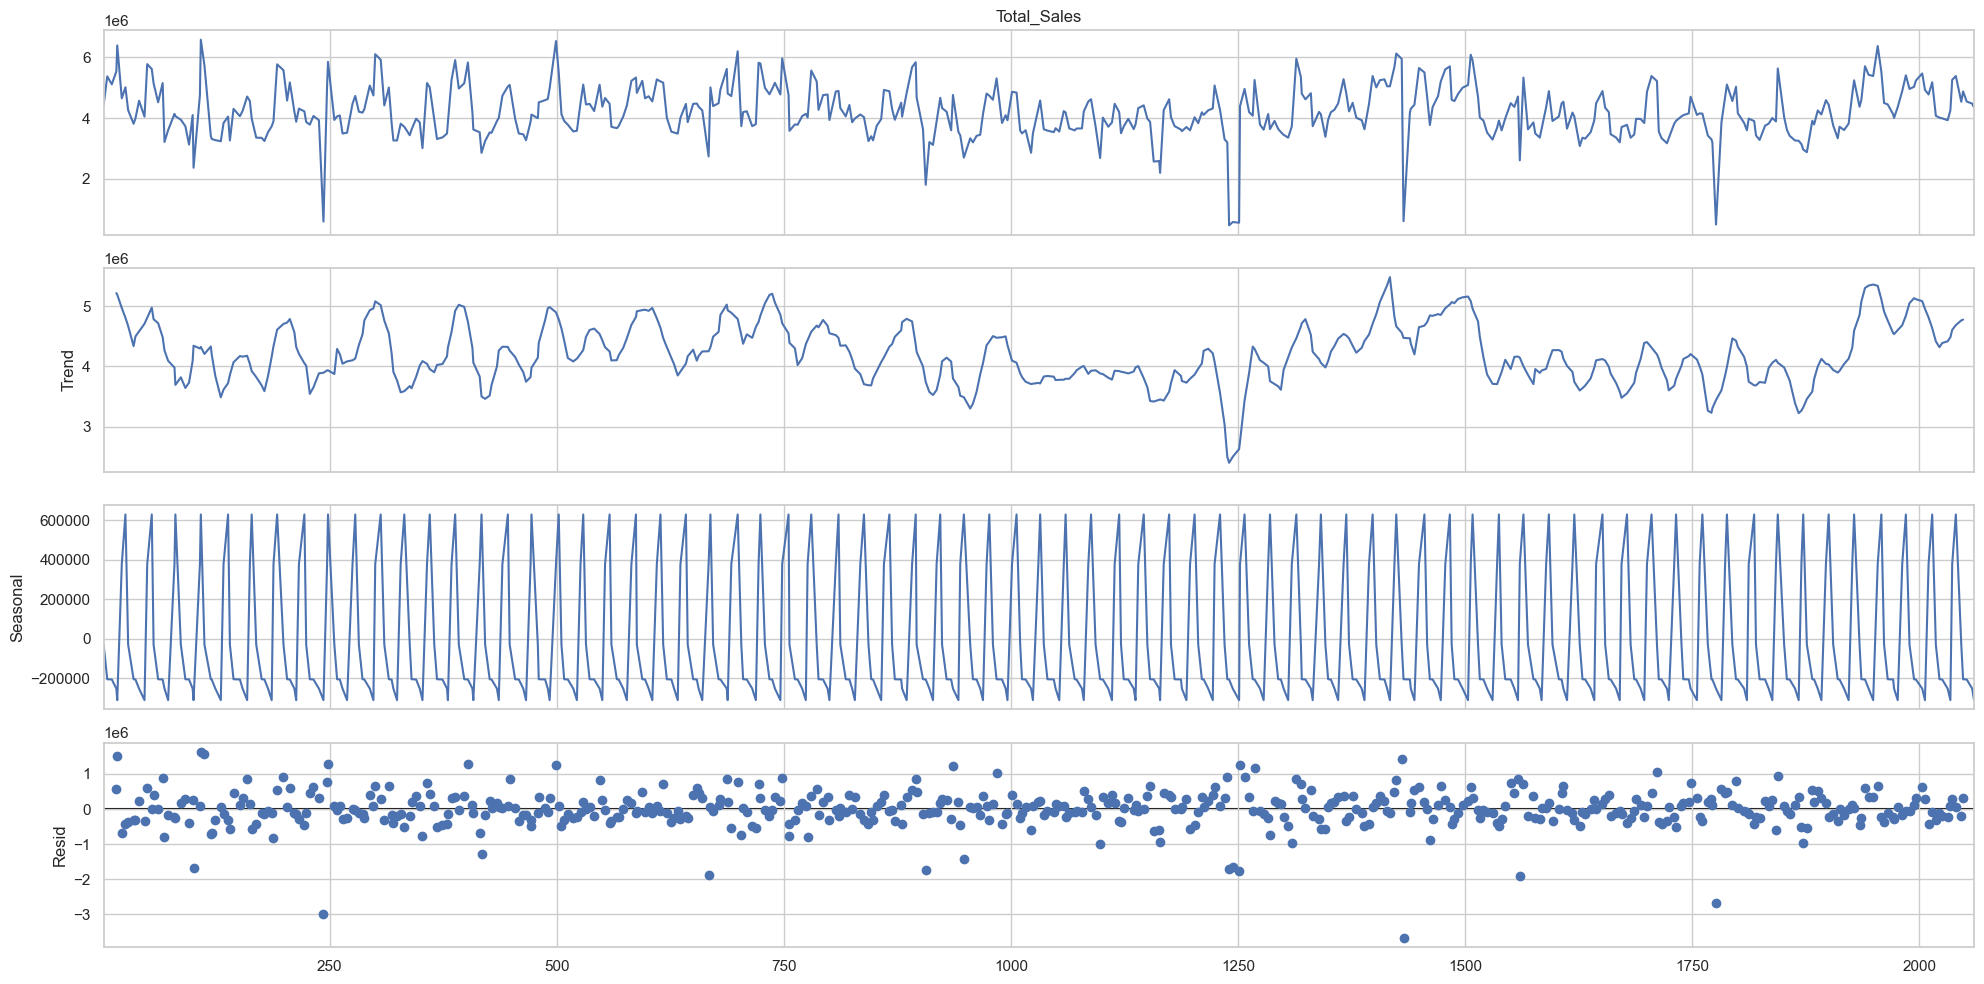

### Seasonal decomposition for Region code: R3

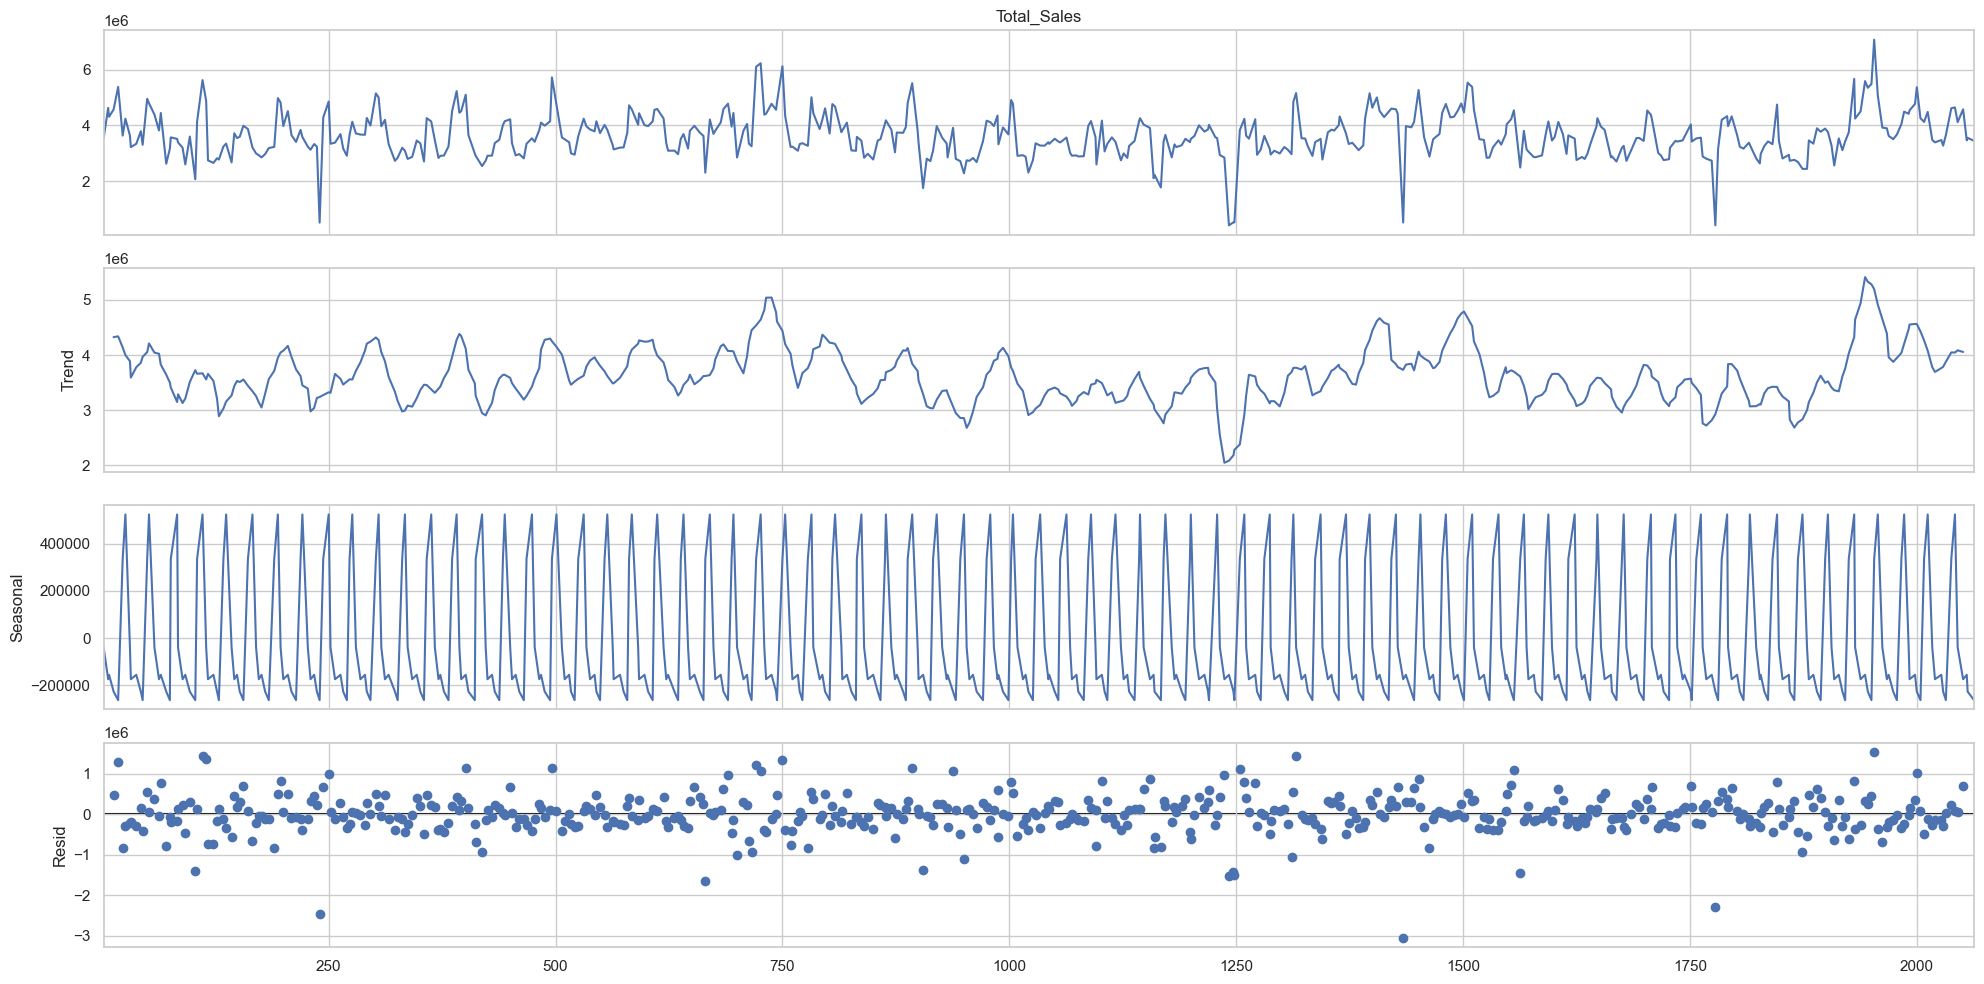

### Seasonal decomposition for Region code: R1

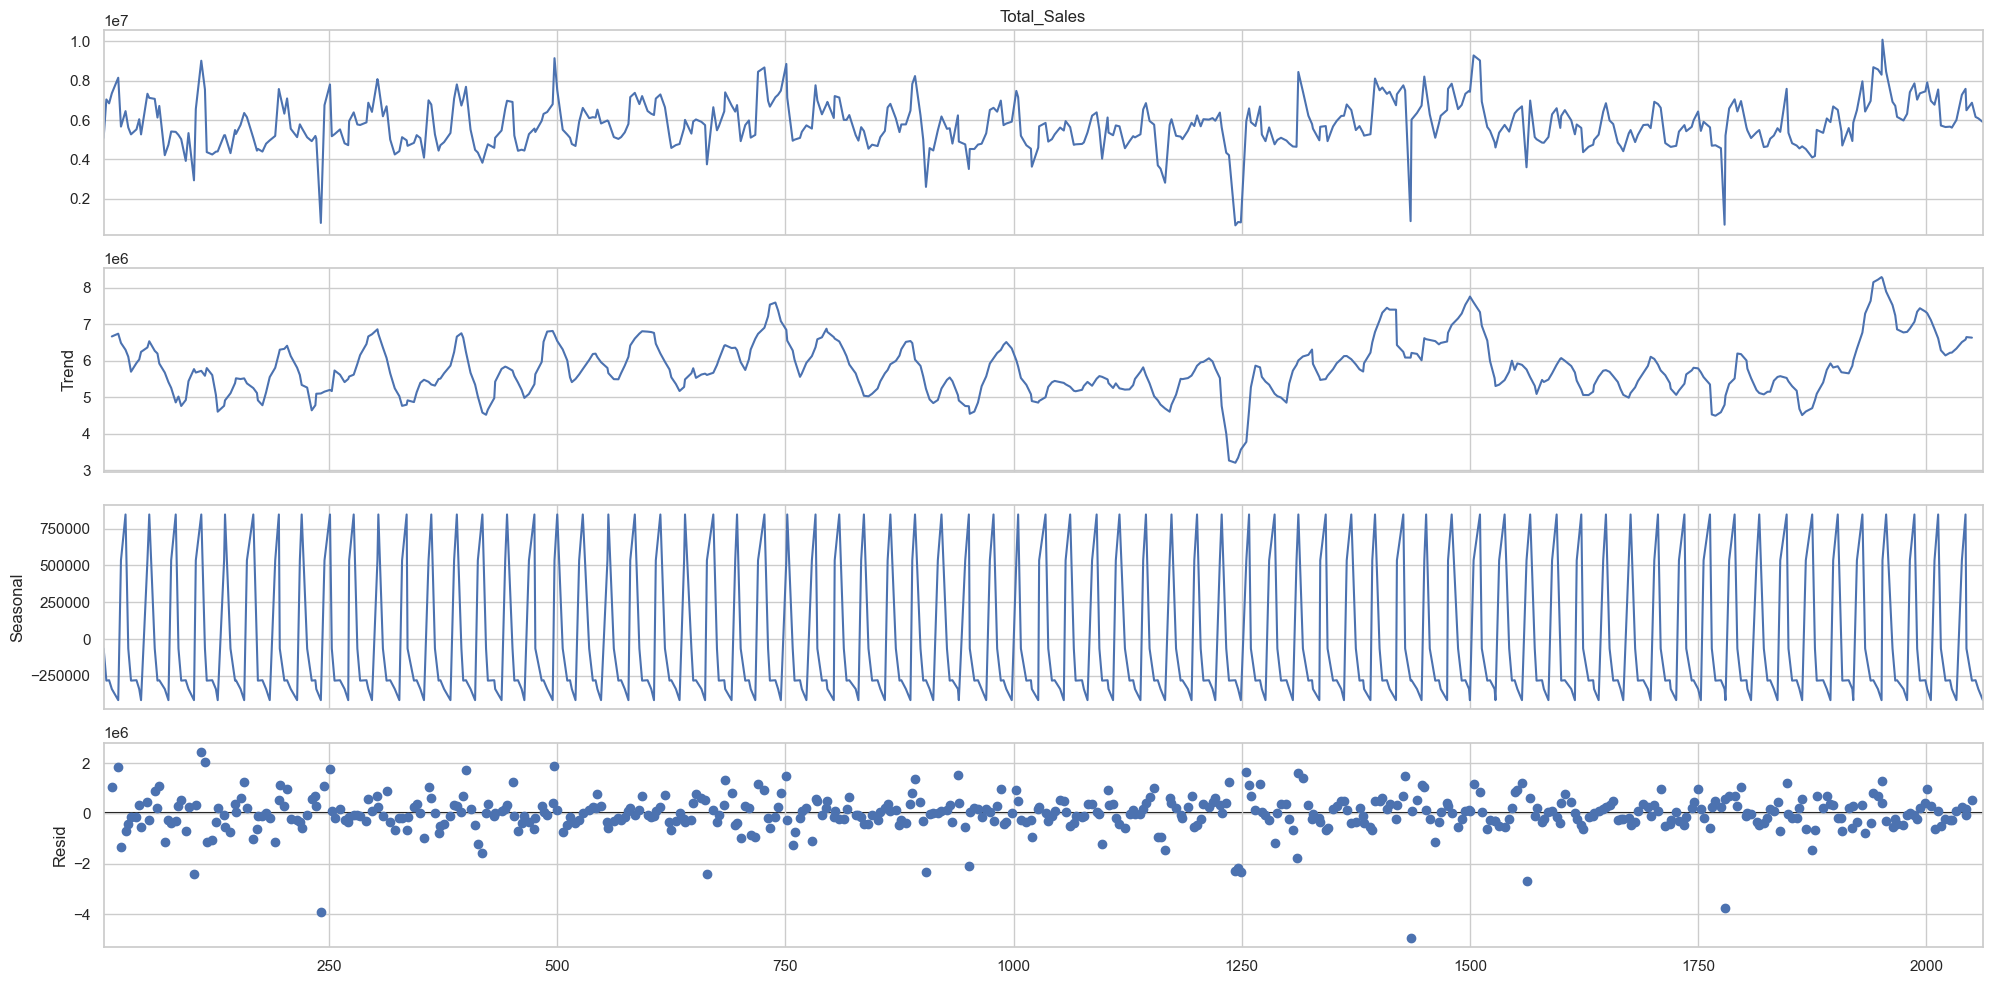

In [10]:
plt.rc("figure",figsize=(20,10))
for Region_Code in train_region_code_agg["Region_Code"].unique():
    display(Markdown('### Seasonal decomposition for Region code: ' + Region_Code))
    result = seasonal_decompose(train_region_code_agg[train_region_code_agg["Region_Code"] == Region_Code]["Total_Sales"], period=7)
    result.plot();
    plt.show()

# Checking for Autocorrelation

### ACF and PACF for Region code: R4

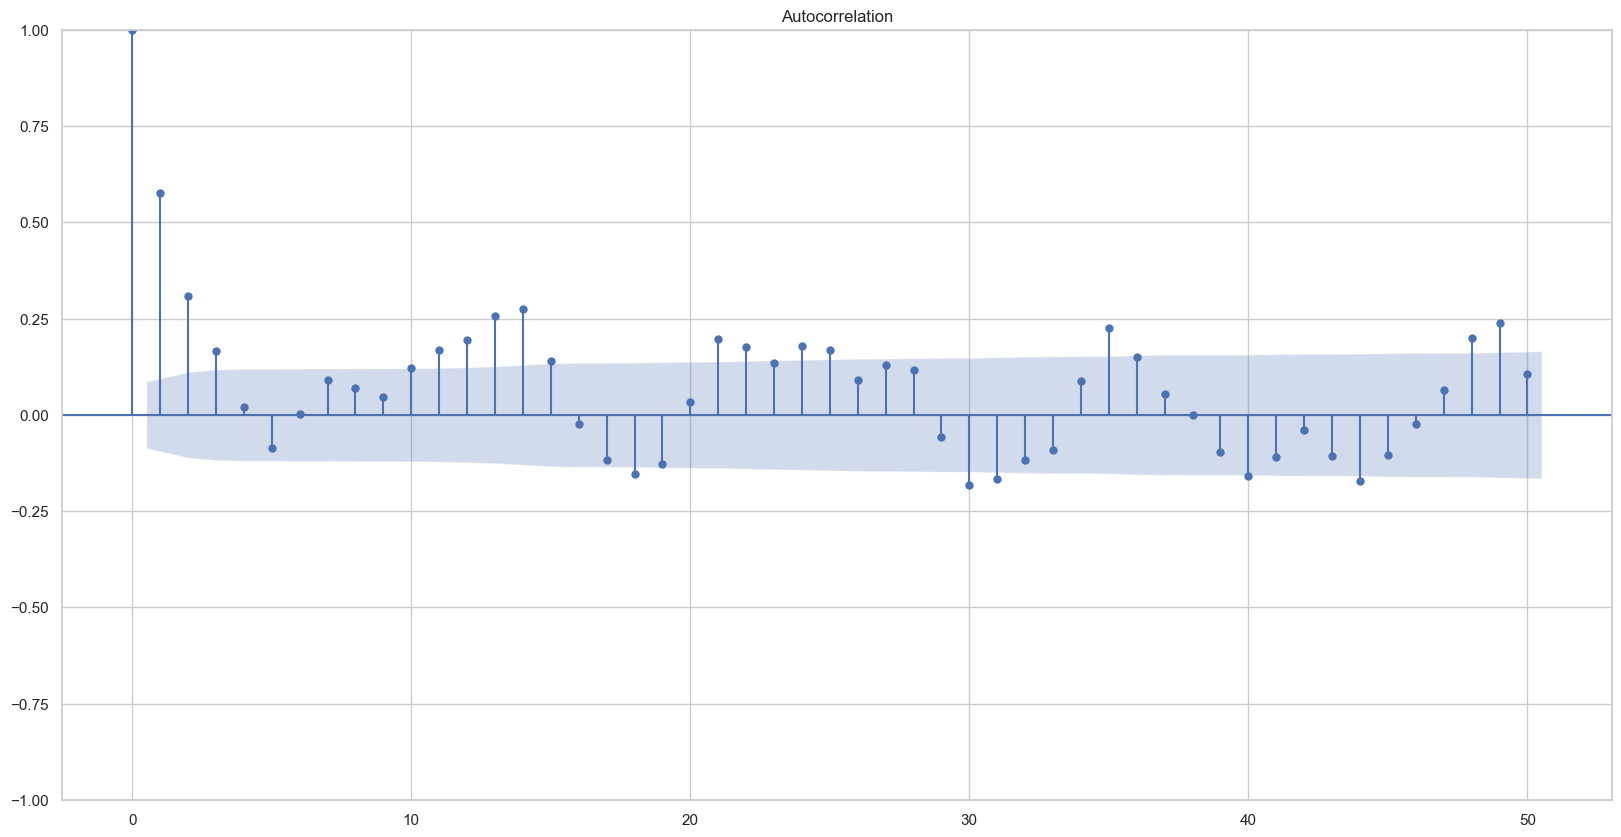

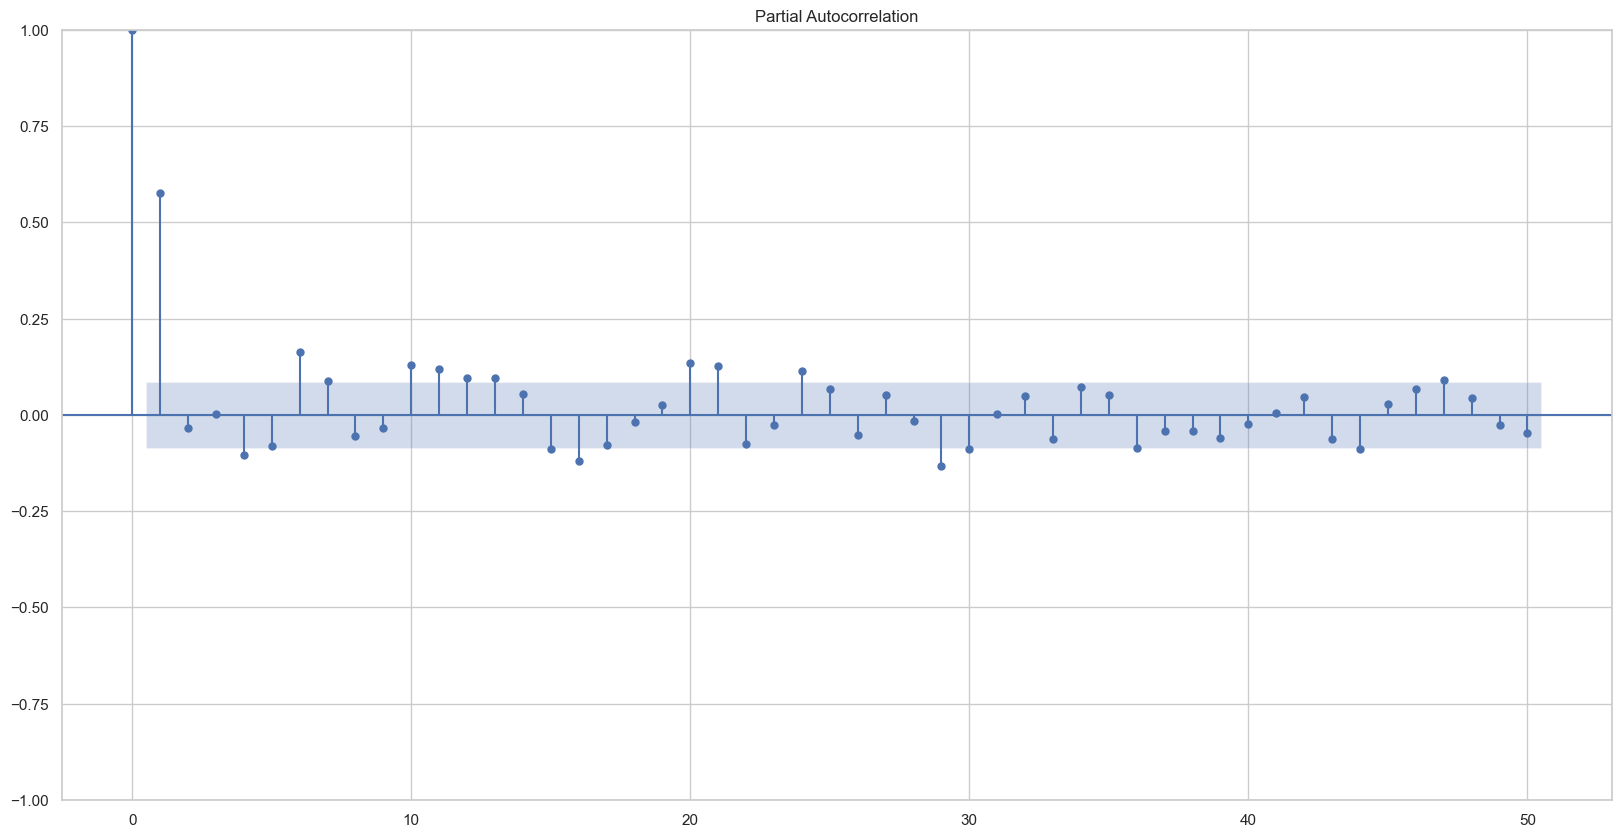

---

### ACF and PACF for Region code: R2

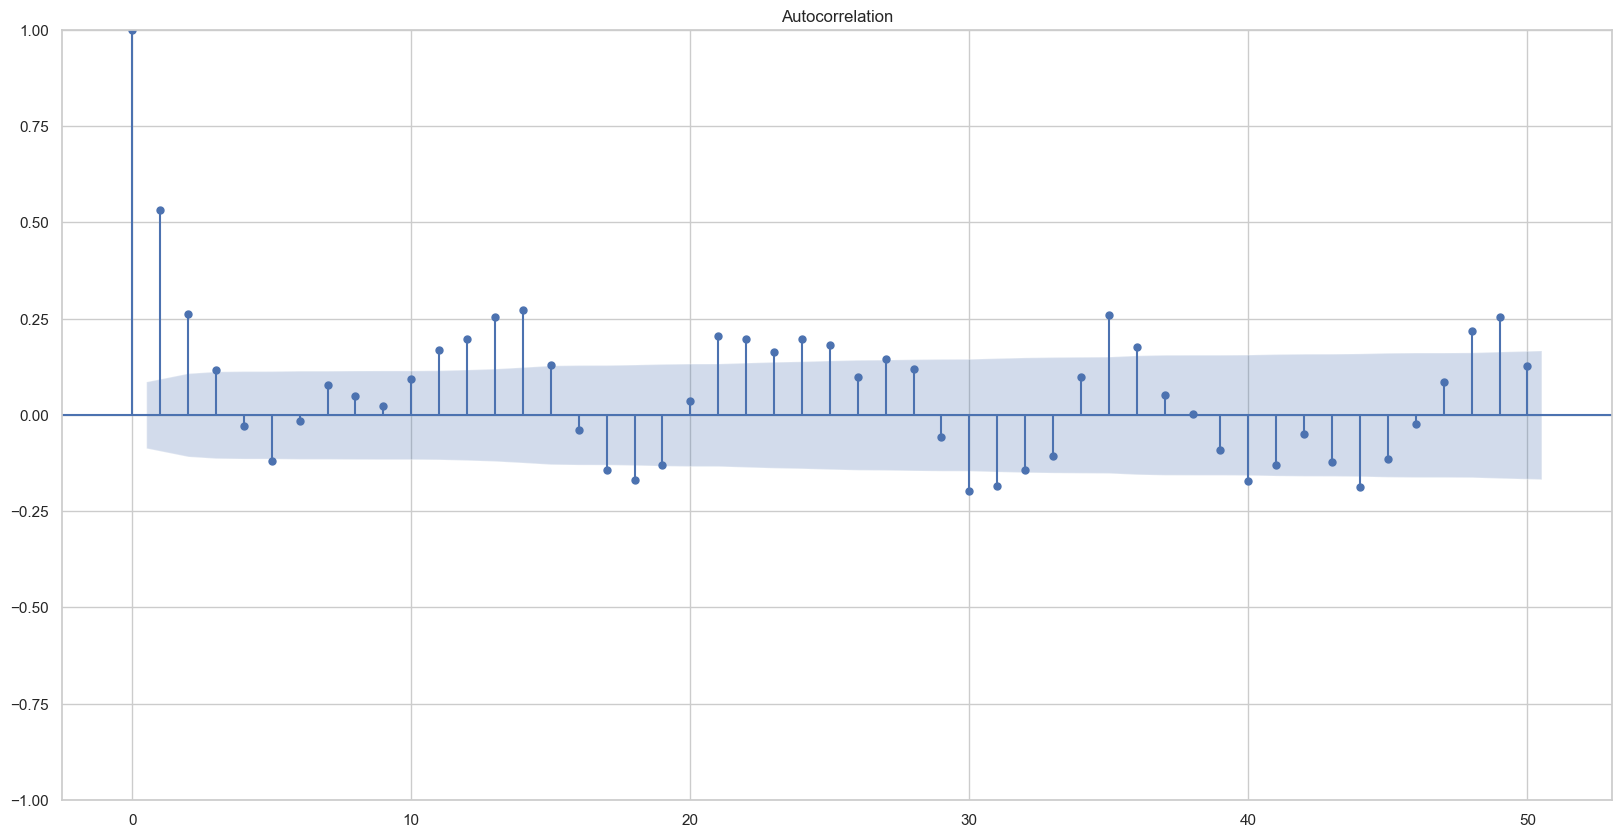

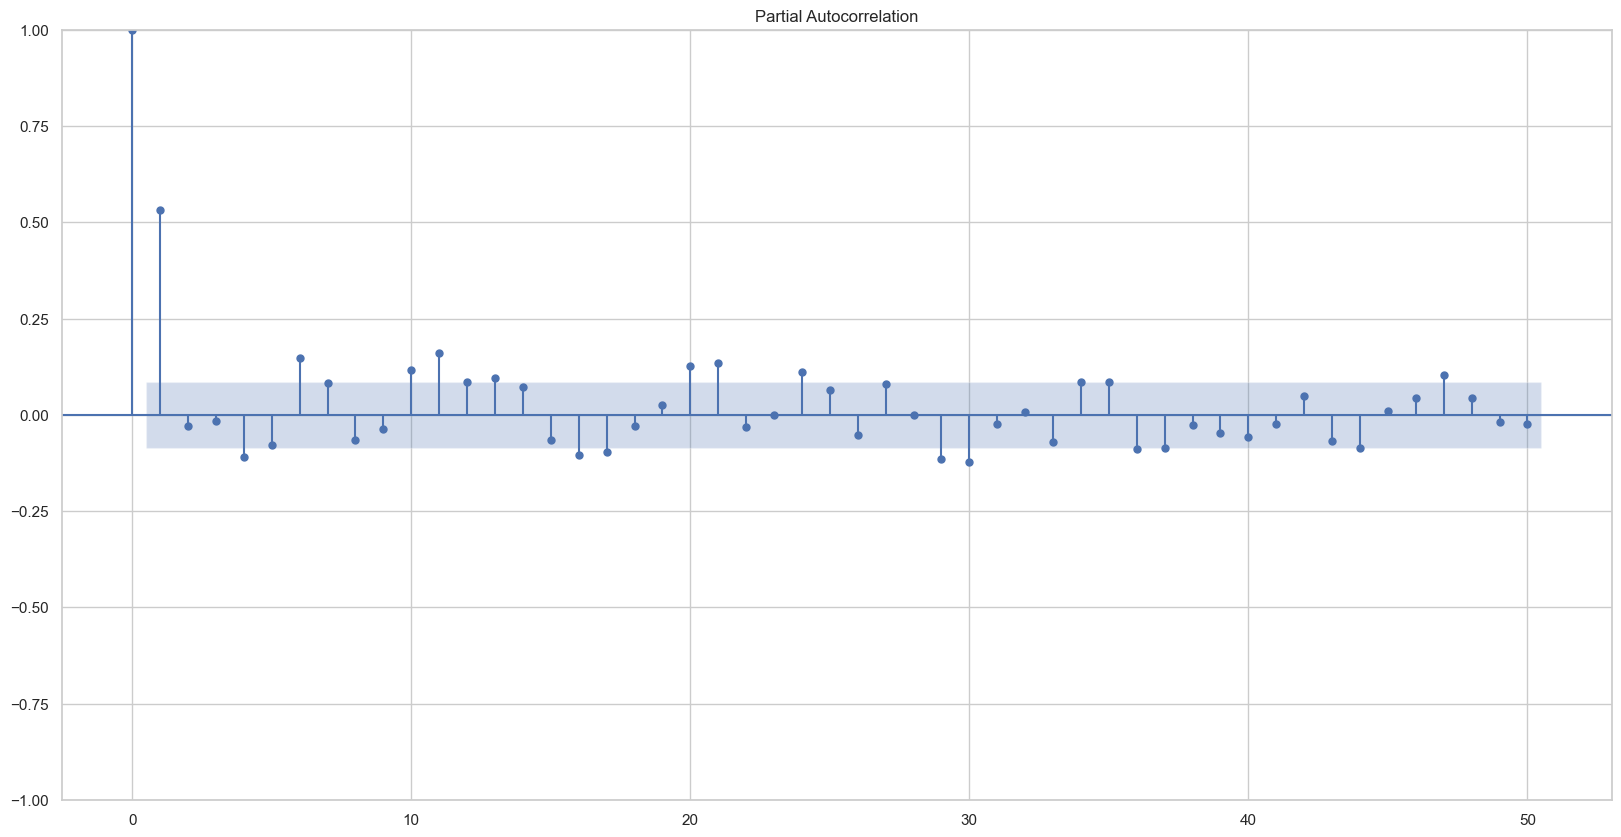

---

### ACF and PACF for Region code: R3

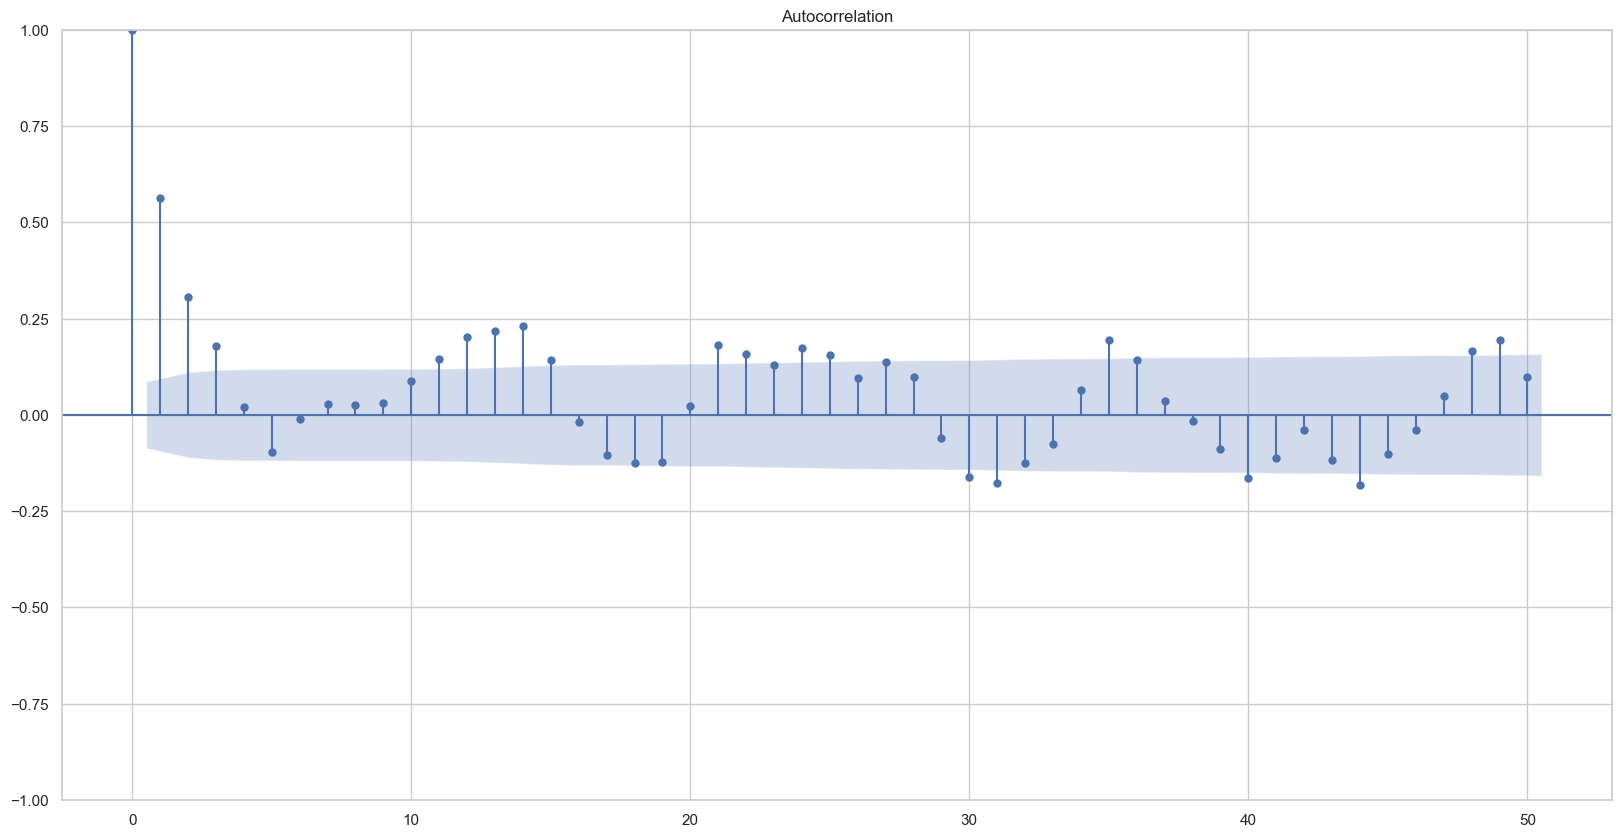

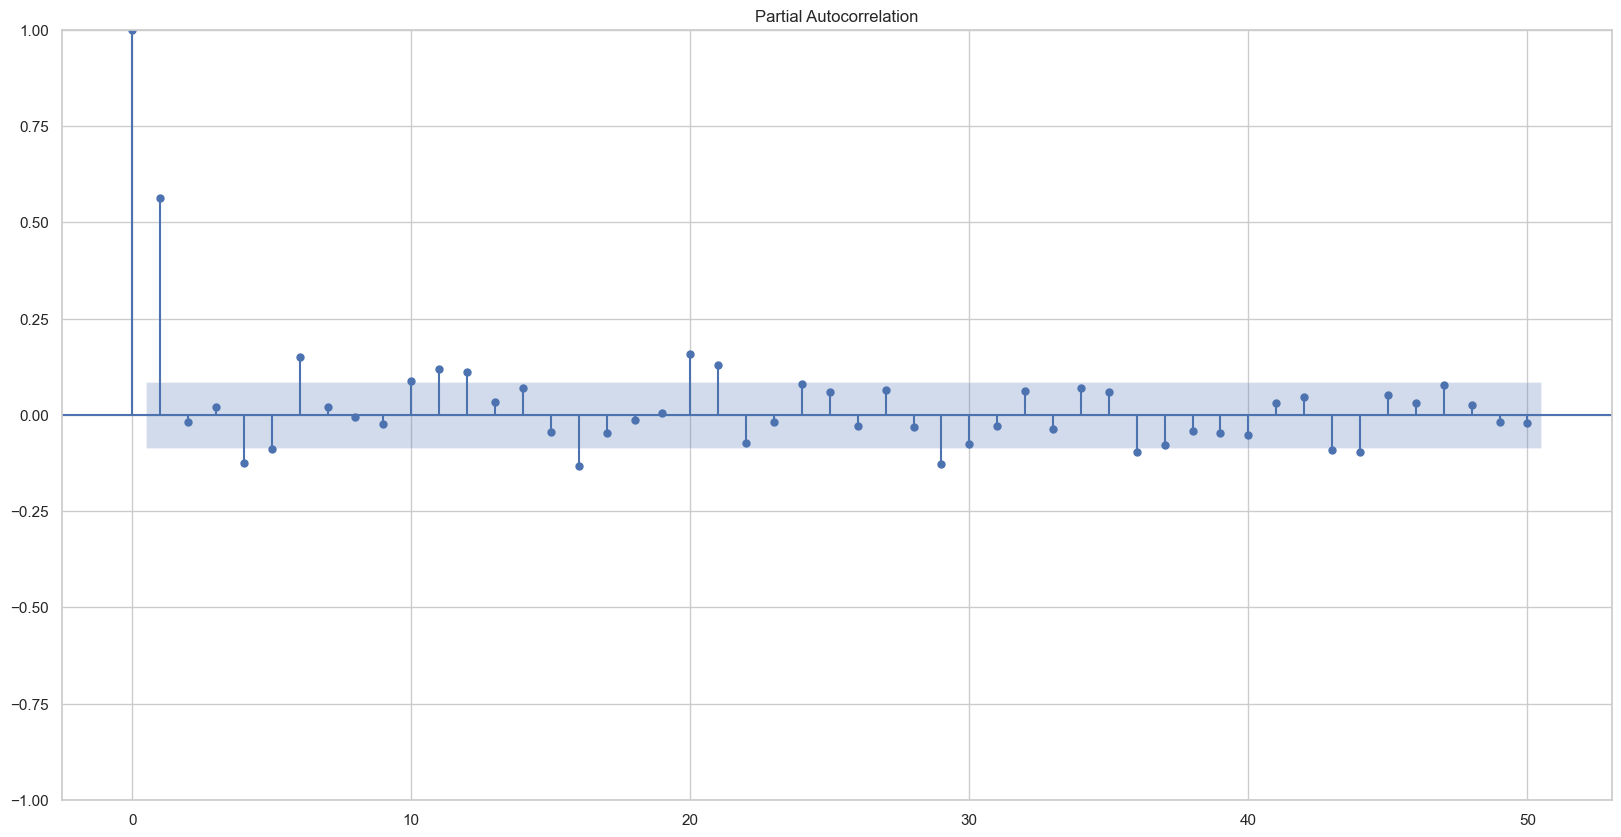

---

### ACF and PACF for Region code: R1

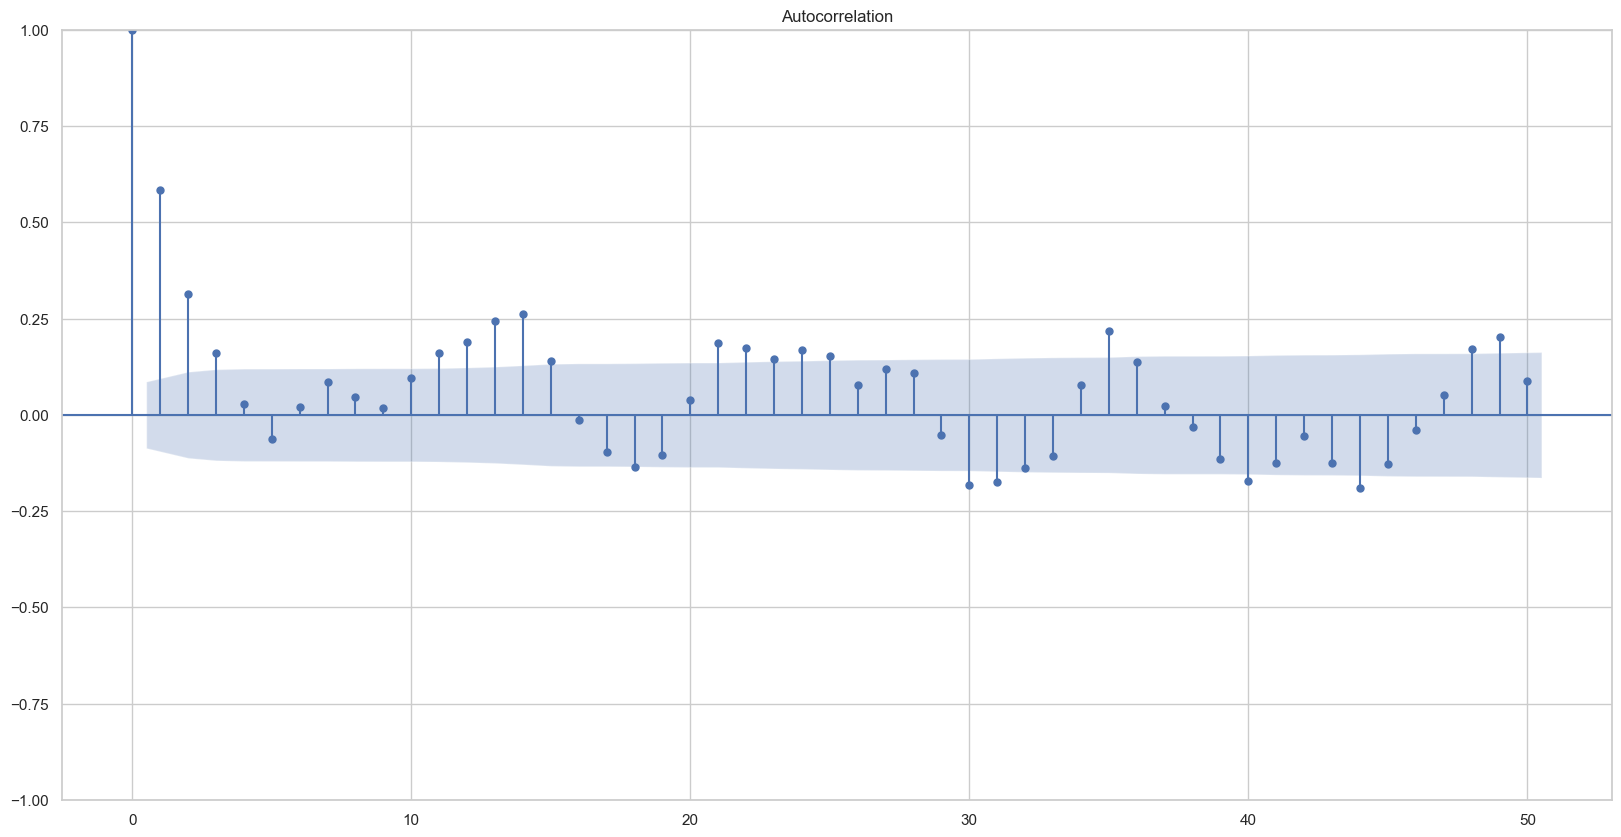

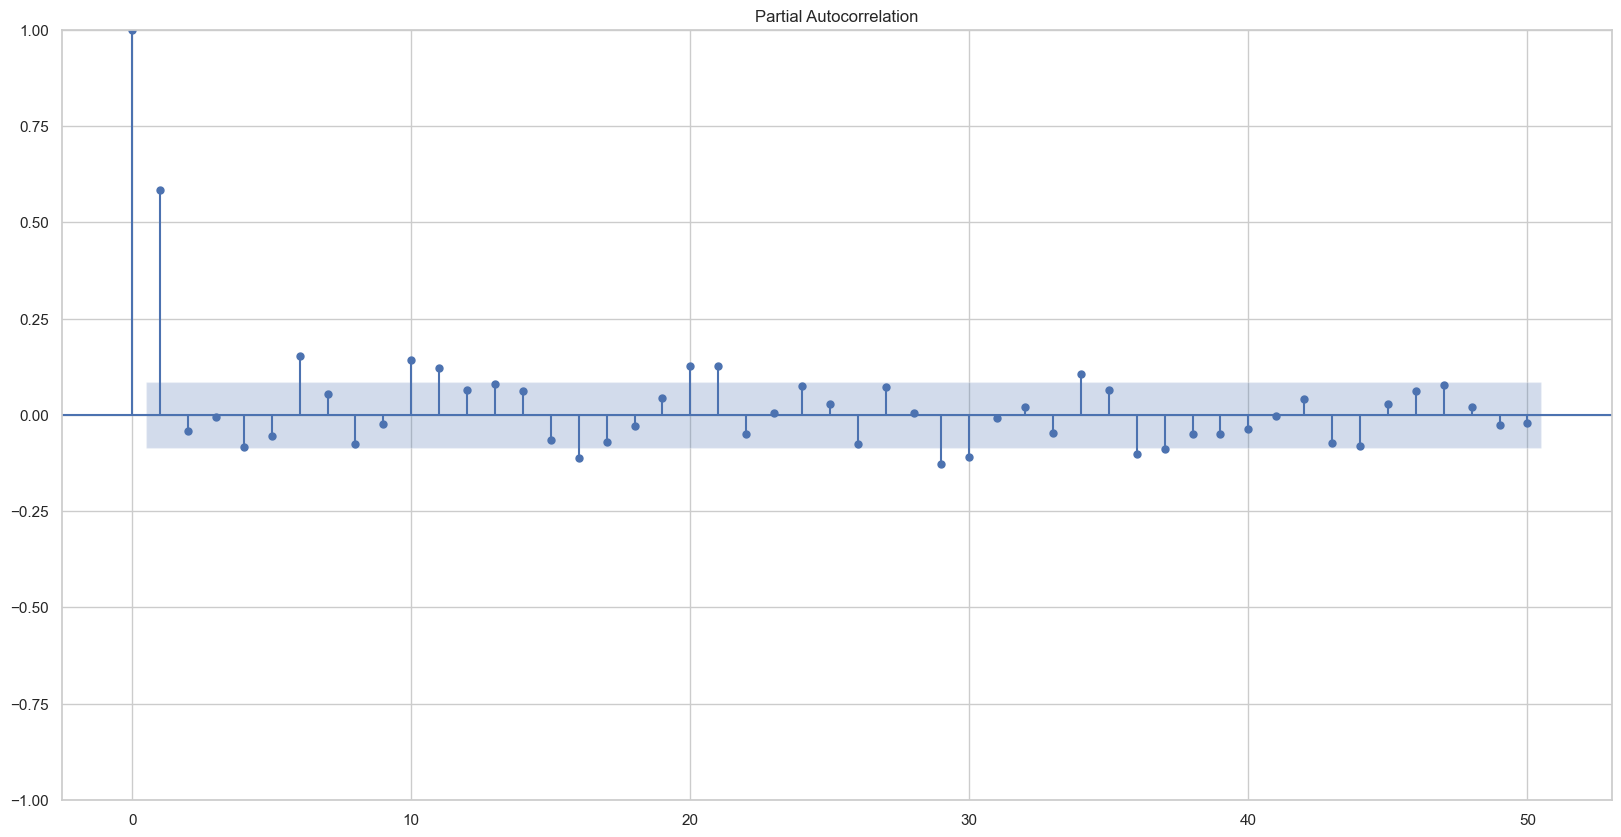

---

In [11]:

for Region_Code in train_region_code_agg["Region_Code"].unique():
    display(Markdown('### ACF and PACF for Region code: ' + Region_Code))
    plot_acf(train_region_code_agg[train_region_code_agg["Region_Code"] == Region_Code]["Total_Sales"], lags=50)
    plot_pacf(train_region_code_agg[train_region_code_agg["Region_Code"] == Region_Code]["Total_Sales"], lags=50)
    plt.show()
    display(Markdown('---'))


<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>

- From above ACF plots we can see that the autocorrelation is high for the first 2 lags and then it drops off. This is a good indicator that the time series is not random and can be forecasted using ARIMA models.
- From above PACF plots we can see that the partial autocorrelation is high for the first 1 lag and then it drops off. This is a good indicator that the time series is not random and can be forecasted using ARIMA models.

- We can also see weekly seasonality in the ACF plot

# Global Sales Analysis

In [12]:
train_agg["Holiday_Sales"] = train_agg["Holiday"]* train_agg["Total_Sales"]
train_agg["Holiday_Sales"] = np.where(train_agg["Holiday"]==0, np.nan, train_agg["Total_Sales"])

In [56]:
fig=px.scatter(train_agg, x="Date", y="Total_Sales", title="Total Sales over time", labels={"Date": "Date", "Total_Sales": "Total Sales"}, trendline="ols", trendline_color_override="red", color_discrete_sequence=["green"])
fig.update_traces(mode='lines')
fig.add_trace(go.Scatter(x=train_agg["Date"], y=train_agg["Holiday_Sales"], mode='markers', name="Holiday Sales", marker=dict(color="blue", size=10)))
# change legend location
fig.update_layout(legend=dict(yanchor="top", y=1, xanchor="right", x=1), height=800,  xaxis=dict(
        range=[train_agg['Date'].min() - pd.Timedelta(days=5), train_agg['Date'].max()+pd.Timedelta(days=5)]  # Force the range to start from the first date
    ))
fig.show()

In [61]:
train_agg.index = train_agg["Date"]

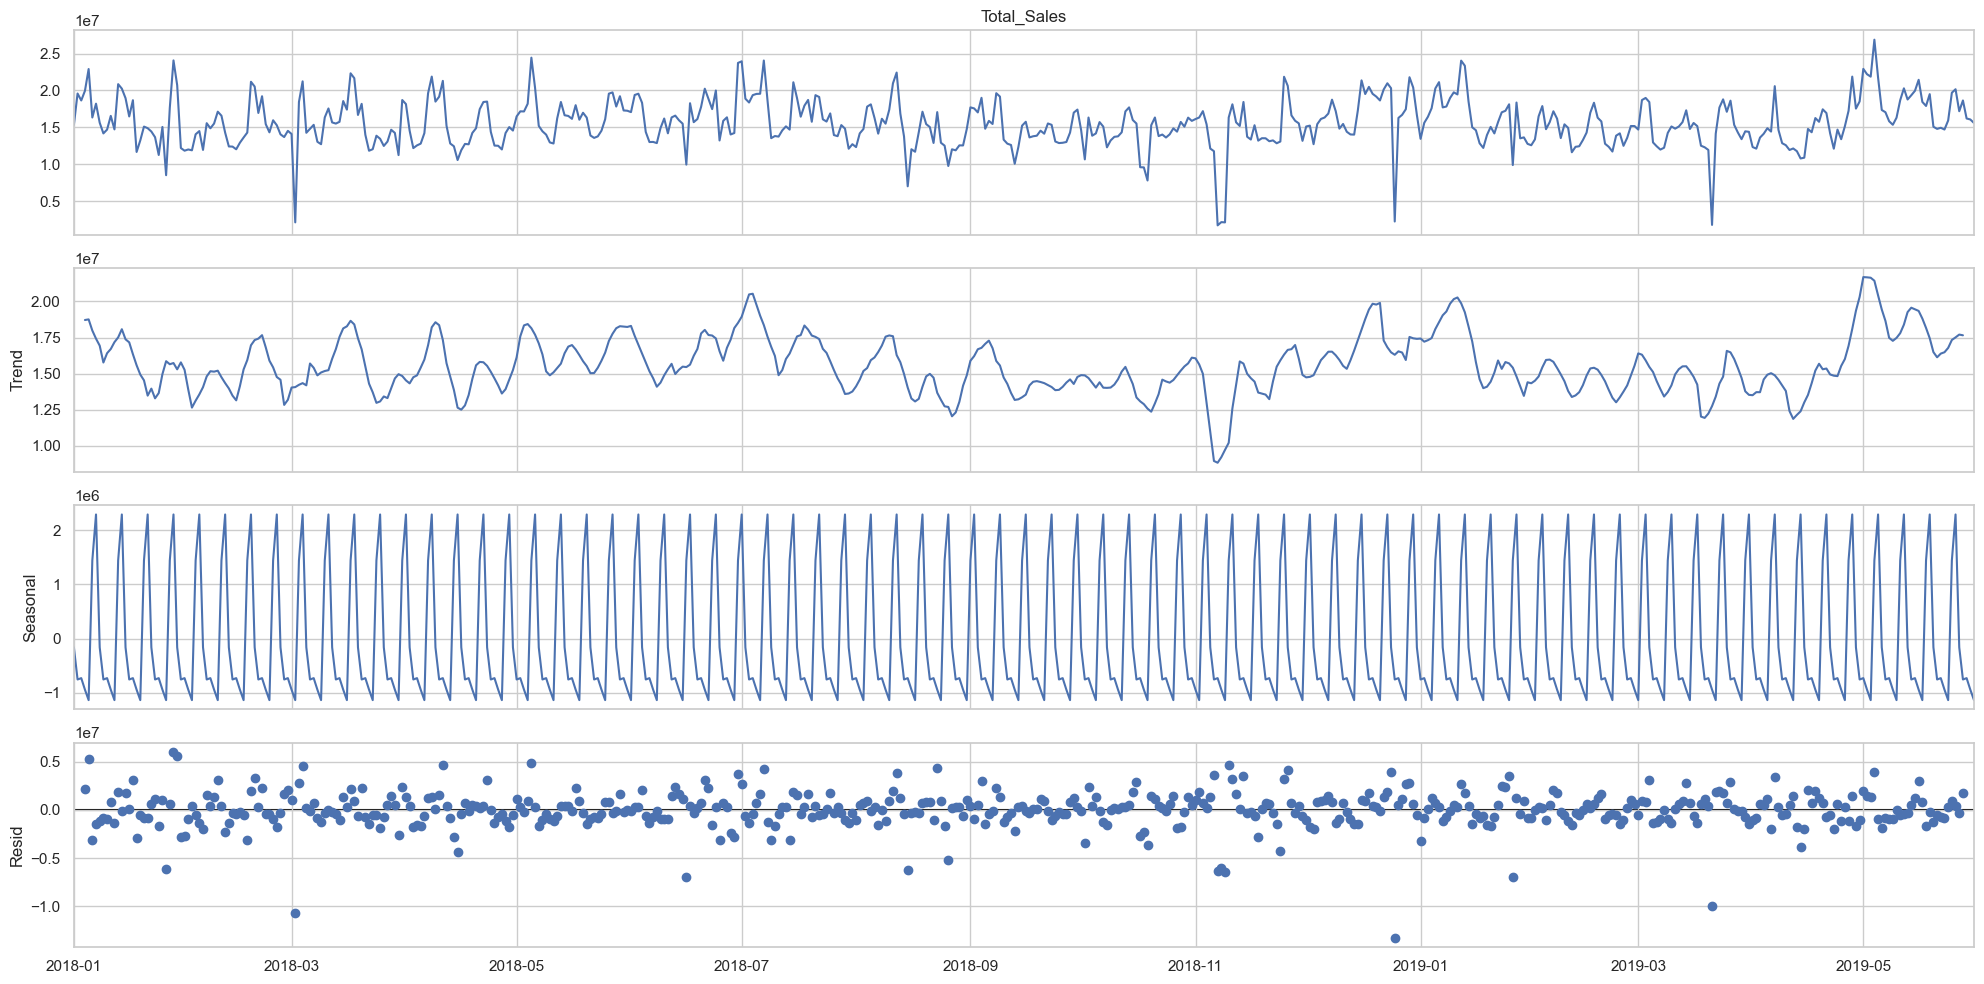

In [63]:
plt.rcParams["figure.figsize"] = (20, 10)
result = seasonal_decompose(train_agg["Total_Sales"])
result.plot();